In [9]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [2]:
# you can set your hyper-parameter here
epochs = 3
batch_size = 64
lr = 0.01
momentum = 0.5
log_interval = 10

In [3]:
# dataset init
train_dataset = torchvision.datasets.MNIST('./data/', train=True, download=True, 
                                           transform=transforms.Compose([
                                               transforms.ToTensor(),
                                               transforms.Normalize((0.1307,),(0.3081,))
                                           ])
                                          )
test_dataset = torchvision.datasets.MNIST('./data/', train=False, download=True, 
                                           transform=transforms.Compose([
                                               transforms.ToTensor(),
                                               transforms.Normalize((0.1307,),(0.3081,))
                                           ])
                                          )
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=4, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, num_workers=4, shuffle=False)

torch.Size([64, 1, 28, 28])
tensor([9, 0, 7, 1, 5, 4, 0, 6, 4, 8, 1, 7, 0, 1, 6, 5, 1, 1, 4, 1, 8, 7, 8, 7,
        0, 8, 1, 7, 7, 1, 2, 3, 7, 5, 0, 8, 7, 3, 3, 1, 4, 0, 9, 6, 3, 4, 2, 8,
        3, 0, 1, 4, 5, 8, 5, 3, 6, 0, 3, 2, 9, 9, 2, 5])


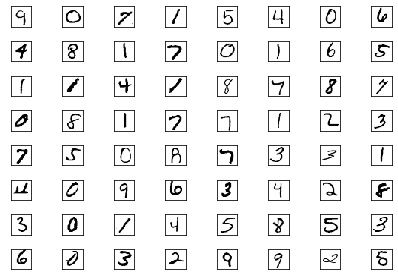

In [4]:
# data visualization
sample, label = next(iter(train_loader))
print(sample.shape)
print(label)
fig, ax = plt.subplots(nrows=8,ncols=8,sharex=True,sharey=True)
ax = ax.flatten()

for i in range(64):
    img = sample[i].numpy().reshape(28,28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [5]:
# Model
class Model(torch.nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        """
        please fill your code here
        """
    def forward(self, x):
        """
        please fill your code here
        """
        return x

In [6]:
# model init
model = Model()
"""
please fill your code here to determine the loss and optimizer
Loss = 
optimizer = 
"""

In [7]:
# training
batch_done = 0
logs = []
for i in range(epochs):
    for data, label in train_loader:
        output = model(data)
        loss = Loss(output,label)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        batch_done += 1
        if batch_done % log_interval == 0:
            logs.append([batch_done,loss.item()])
            print('Epoch {}: {}/{} loss:{}'.format(i, (batch_done)%len(train_loader), len(train_loader), loss.item()))
        

Epoch 0: 640/938 loss:1.0039852857589722
Epoch 0: 342/938 loss:0.4863392412662506
Epoch 0: 44/938 loss:0.5460516810417175
Epoch 0: 684/938 loss:0.46524977684020996
Epoch 0: 386/938 loss:0.2520464360713959
Epoch 0: 88/938 loss:0.12077509611845016
Epoch 0: 728/938 loss:0.3583550751209259
Epoch 0: 430/938 loss:0.30285391211509705
Epoch 0: 132/938 loss:0.3595989942550659
Epoch 0: 772/938 loss:0.21844378113746643
Epoch 0: 474/938 loss:0.1853259950876236
Epoch 0: 176/938 loss:0.2619903087615967
Epoch 0: 816/938 loss:0.19024372100830078
Epoch 0: 518/938 loss:0.08840318024158478
Epoch 0: 220/938 loss:0.07723169773817062
Epoch 0: 860/938 loss:0.10303429514169693
Epoch 0: 562/938 loss:0.2857339680194855
Epoch 0: 264/938 loss:0.11868809908628464
Epoch 0: 904/938 loss:0.28848958015441895
Epoch 0: 606/938 loss:0.07629013061523438
Epoch 0: 308/938 loss:0.2548845410346985
Epoch 0: 10/938 loss:0.111384816467762
Epoch 0: 650/938 loss:0.13046963512897491
Epoch 0: 352/938 loss:0.16166101396083832
Epoch 0

Epoch 2: 686/938 loss:0.03712156042456627
Epoch 2: 388/938 loss:0.02683233842253685
Epoch 2: 90/938 loss:0.0077825584448874
Epoch 2: 730/938 loss:0.00728248106315732
Epoch 2: 432/938 loss:0.02645273692905903
Epoch 2: 134/938 loss:0.027634523808956146
Epoch 2: 774/938 loss:0.09511132538318634
Epoch 2: 476/938 loss:0.02814025990664959
Epoch 2: 178/938 loss:0.041022591292858124
Epoch 2: 818/938 loss:0.004856271203607321
Epoch 2: 520/938 loss:0.01794072426855564
Epoch 2: 222/938 loss:0.01926932856440544
Epoch 2: 862/938 loss:0.04131205752491951
Epoch 2: 564/938 loss:0.014564020559191704
Epoch 2: 266/938 loss:0.014250163920223713
Epoch 2: 906/938 loss:0.09059607982635498
Epoch 2: 608/938 loss:0.0034892146941274405
Epoch 2: 310/938 loss:0.03505678102374077
Epoch 2: 12/938 loss:0.05972805991768837
Epoch 2: 652/938 loss:0.021615300327539444
Epoch 2: 354/938 loss:0.03903045132756233
Epoch 2: 56/938 loss:0.006190803833305836
Epoch 2: 696/938 loss:0.09682336449623108
Epoch 2: 398/938 loss:0.05495

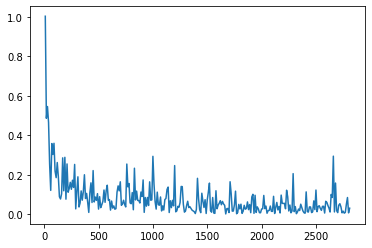

In [10]:
# loss curve visualization
logs = np.array(logs)
plt.plot(logs[:,0],logs[:,1])

In [15]:
# evaluation
model.eval()
correct = 0
for data, label in test_loader:
    output = model(data)
    _,pred = torch.max(output, dim=1)
    correct += float(torch.sum(pred == label))

print('test_acc:{}'.format(correct/len(test_dataset)))
    

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3])
tensor([7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
        6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7,
        3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5])
tensor([8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9,
        5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7,
        1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1])
tensor([0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0,
        3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1,
        5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7])
tensor([2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1,
        2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0,

        1, 0, 1, 8, 9, 1, 6, 8, 3, 8, 9, 3, 6, 2, 8, 3])
tensor([2, 2, 1, 0, 4, 2, 9, 2, 4, 3, 7, 9, 1, 5, 2, 4, 9, 0, 3, 8, 5, 3, 6, 0,
        9, 4, 6, 2, 5, 0, 0, 7, 4, 6, 6, 8, 6, 6, 8, 6, 9, 1, 7, 2, 5, 9, 9, 0,
        7, 2, 7, 6, 7, 0, 6, 5, 4, 4, 7, 2, 0, 9, 9, 2])
tensor([2, 9, 4, 4, 2, 3, 3, 2, 1, 7, 0, 7, 6, 4, 1, 3, 8, 7, 4, 5, 9, 2, 5, 1,
        8, 7, 3, 7, 1, 5, 5, 0, 9, 1, 4, 0, 6, 3, 5, 6, 0, 4, 9, 7, 5, 1, 6, 8,
        9, 5, 5, 7, 9, 3, 8, 3, 8, 1, 5, 3, 5, 0, 5, 5])
tensor([3, 8, 6, 7, 7, 7, 3, 7, 0, 5, 9, 0, 2, 5, 5, 3, 1, 7, 7, 8, 6, 5, 9, 3,
        8, 9, 5, 3, 7, 9, 1, 7, 0, 0, 3, 7, 2, 5, 8, 1, 8, 6, 2, 9, 5, 7, 5, 7,
        8, 6, 2, 5, 1, 4, 8, 4, 5, 8, 3, 0, 6, 2, 7, 3])
tensor([3, 2, 1, 0, 7, 3, 9, 0, 3, 9, 3, 2, 8, 9, 0, 3, 8, 0, 7, 6, 5, 4, 7, 3,
        9, 0, 8, 6, 2, 5, 1, 1, 0, 0, 4, 4, 0, 1, 2, 3, 2, 7, 7, 8, 5, 2, 5, 7,
        6, 9, 1, 4, 1, 6, 4, 2, 4, 3, 5, 4, 3, 9, 5, 0])
tensor([1, 5, 3, 8, 9, 1, 9, 7, 9, 5, 5, 2, 7, 4, 6, 0, 1, 1, 1, 0, 4, 4, 7

        2, 8, 8, 6, 8, 1, 3, 7, 9, 0, 1, 1, 9, 7, 0, 8])
tensor([1, 7, 4, 5, 7, 1, 2, 1, 1, 3, 0, 6, 2, 1, 2, 8, 0, 7, 6, 6, 9, 3, 7, 0,
        5, 2, 8, 0, 5, 4, 3, 8, 4, 6, 6, 2, 7, 9, 5, 1, 3, 2, 4, 3, 6, 1, 9, 4,
        4, 7, 6, 5, 4, 1, 9, 9, 2, 7, 8, 0, 1, 3, 6, 1])
tensor([3, 4, 1, 1, 1, 5, 6, 0, 7, 0, 7, 2, 3, 2, 5, 2, 2, 9, 4, 9, 8, 1, 2, 1,
        6, 1, 2, 7, 8, 0, 0, 0, 8, 2, 2, 9, 2, 2, 8, 9, 9, 2, 7, 5, 1, 3, 4, 9,
        4, 1, 8, 5, 6, 2, 8, 3, 1, 2, 8, 4, 9, 9, 3, 7])
tensor([0, 7, 7, 2, 3, 2, 4, 0, 3, 9, 9, 8, 4, 1, 0, 6, 0, 9, 6, 8, 6, 1, 1, 9,
        8, 9, 2, 3, 5, 5, 9, 4, 2, 1, 9, 4, 3, 9, 6, 0, 4, 0, 6, 0, 1, 2, 3, 4,
        7, 8, 9, 0, 1, 2, 3, 4, 7, 8, 9, 0, 1, 2, 3, 4])
tensor([5, 6, 7, 8, 9, 8, 3, 4, 7, 8, 6, 3, 4, 0, 9, 7, 1, 9, 3, 8, 4, 7, 3, 0,
        9, 1, 4, 5, 4, 6, 2, 0, 6, 2, 1, 1, 1, 1, 7, 2, 4, 7, 5, 2, 9, 4, 5, 8,
        4, 2, 9, 7, 0, 0, 7, 5, 1, 1, 7, 6, 6, 6, 8, 2])
tensor([2, 7, 7, 4, 0, 2, 4, 2, 1, 8, 9, 6, 1, 0, 5, 9, 6, 9, 8, 0, 3, 0, 8

        1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6])
tensor([7, 8, 9, 1, 7, 4, 8, 1, 5, 6, 5, 7, 2, 8, 6, 3, 3, 8, 6, 5, 4, 0, 9, 1,
        7, 2, 9, 1, 5, 1, 3, 2, 2, 3, 0, 6, 4, 3, 7, 6, 9, 0, 4, 8, 1, 4, 0, 6,
        1, 2, 6, 9, 2, 2, 3, 5, 5, 1, 0, 7, 7, 9, 6, 2])
tensor([9, 4, 7, 0, 2, 3, 4, 0, 0, 8, 8, 8, 5, 1, 3, 7, 4, 9, 8, 8, 9, 0, 9, 8,
        9, 0, 2, 6, 5, 6, 7, 4, 7, 5, 4, 1, 3, 5, 3, 1, 2, 3, 4, 5, 6, 1, 2, 3,
        4, 6, 0, 1, 2, 4, 5, 6, 7, 8, 1, 7, 2, 4, 1, 4])
tensor([1, 4, 9, 6, 8, 4, 5, 3, 7, 8, 4, 3, 3, 5, 6, 7, 0, 6, 1, 6, 8, 7, 0, 1,
        5, 0, 8, 5, 0, 1, 5, 8, 4, 2, 3, 9, 7, 6, 9, 1, 9, 0, 6, 7, 1, 2, 3, 9,
        2, 4, 5, 5, 3, 7, 5, 3, 1, 8, 2, 2, 3, 0, 2, 9])
tensor([4, 9, 7, 0, 2, 7, 4, 9, 9, 2, 5, 9, 8, 3, 8, 6, 7, 0, 0, 1, 2, 3, 4, 5,
        6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
        0, 0, 7, 2, 6, 5, 5, 3, 7, 8, 6, 6, 6, 6, 4, 3])
tensor([8, 8, 3, 0, 1, 9, 0, 5, 4, 1, 9, 1, 2, 7, 0, 1, 3, 8, 2, 9, 2, 7, 4

        8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3])
tensor([4, 6, 6, 7, 8, 9, 7, 4, 6, 1, 4, 0, 9, 9, 3, 7, 8, 4, 7, 5, 8, 5, 3, 2,
        2, 0, 5, 8, 6, 0, 3, 8, 1, 0, 3, 0, 4, 7, 4, 9, 2, 9, 0, 7, 1, 7, 1, 6,
        6, 5, 6, 2, 8, 7, 6, 4, 9, 9, 5, 3, 7, 4, 3, 0])
tensor([4, 6, 6, 1, 1, 3, 2, 1, 0, 0, 1, 2, 3, 4, 7, 8, 9, 0, 1, 8, 3, 4, 5, 6,
        7, 8, 0, 1, 2, 3, 4, 7, 8, 9, 0, 8, 3, 9, 5, 5, 2, 6, 8, 4, 1, 7, 1, 3,
        3, 5, 6, 9, 1, 1, 1, 2, 1, 2, 0, 7, 7, 5, 8, 2])
tensor([9, 8, 6, 7, 3, 4, 6, 8, 7, 0, 4, 2, 7, 7, 5, 4, 3, 4, 2, 8, 1, 5, 1, 0,
        2, 3, 3, 5, 7, 0, 6, 8, 6, 3, 9, 9, 8, 2, 7, 7, 1, 0, 1, 7, 8, 9, 0, 1,
        2, 9, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 7, 8, 9, 7])
tensor([8, 6, 4, 1, 9, 3, 8, 4, 4, 7, 0, 1, 9, 2, 8, 7, 8, 2, 6, 0, 6, 5, 3, 3,
        3, 9, 1, 4, 0, 6, 1, 0, 0, 6, 2, 1, 1, 7, 7, 8, 4, 6, 0, 7, 0, 3, 6, 8,
        7, 1, 5, 2, 4, 9, 4, 3, 6, 4, 1, 7, 2, 6, 5, 0])
tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6])
test_acc:63.012738

test_acc:0.9893
